In [1]:
import numpy as np
import torch
import torch.nn as nn   
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

In [2]:
num_data = 1000 
num_epoch = 500

noise = init.normal_(torch.FloatTensor(num_data,1),std=0.2)
x = init.uniform_(torch.Tensor(num_data,1),-10,10)
y = 2*x+3
y_noise = y+noise


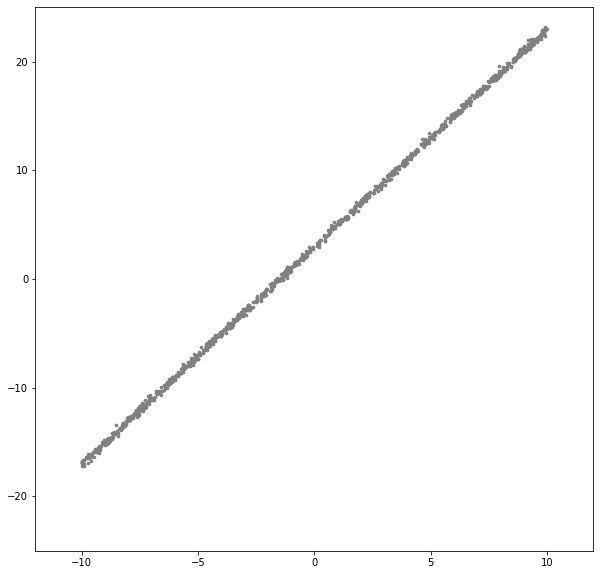

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(x.numpy(),y_noise.numpy(),s=7,c="gray")
plt.axis([-12, 12, -25, 25])
plt.show()

In [4]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

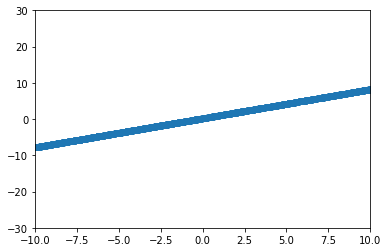

tensor(6.4340)


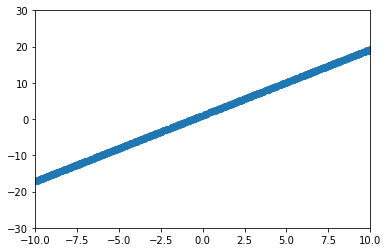

tensor(1.9284)


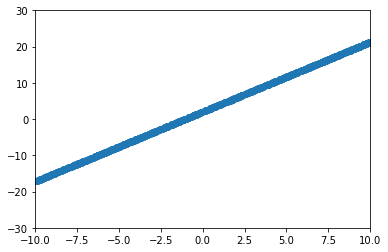

tensor(0.9647)


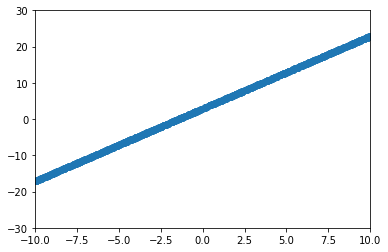

tensor(0.1821)


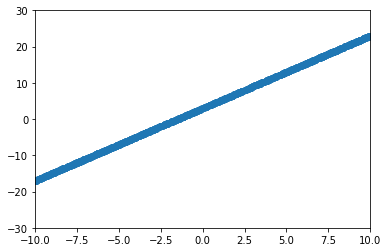

tensor(0.1600)


In [5]:
loss_arr =[]
label = y_noise

# 500으로 지정했던 학습 횟수만큼 반복합니다.
for i in range(num_epoch):
  
    # 이전 학습의 기울기를 지우고 최적화 함수를 초기화해줍니다.
    # 기울기를 지우지 않으면 기존의 업데이트 때문에 학습이 잘 이루어지지 않습니다.
    optimizer.zero_grad()
    
    # 입력값 x를 모델에 넣어 결과값을 얻습니다.
    output = model(x)
    
    # 결과값과 목표값의 차이를 L1 손실 함수로 구해줍니다.
    loss = loss_func(output,label)
    
    # 손실에 대한 기울기를 구합니다.
    loss.backward()
    
    # 구한 기울기를 이용해 모델의 변수를 업데이트 합니다.
    optimizer.step()
    
    # 100번 마다 모델의 변수가 어떻게 변하고 있는지 출력해줍니다.
    if i % 100 == 0:
        # https://pytorch.org/docs/stable/tensors.html?highlight=detach#torch.Tensor.detach
        # 현재 연산 그래프에 속해있는 x, output 값을 detach를 통해 분리하고, 텐서를 넘파이 배열로 바꿔서 plt.scatter에 전달합니다.
        plt.scatter(x.detach().numpy(),output.detach().numpy())
        plt.axis([-10, 10, -30, 30])
        plt.show()
        print(loss.data)
        
    # 손실을 loss_arr에 추가해줍니다.
    loss_arr.append(loss.detach().numpy())

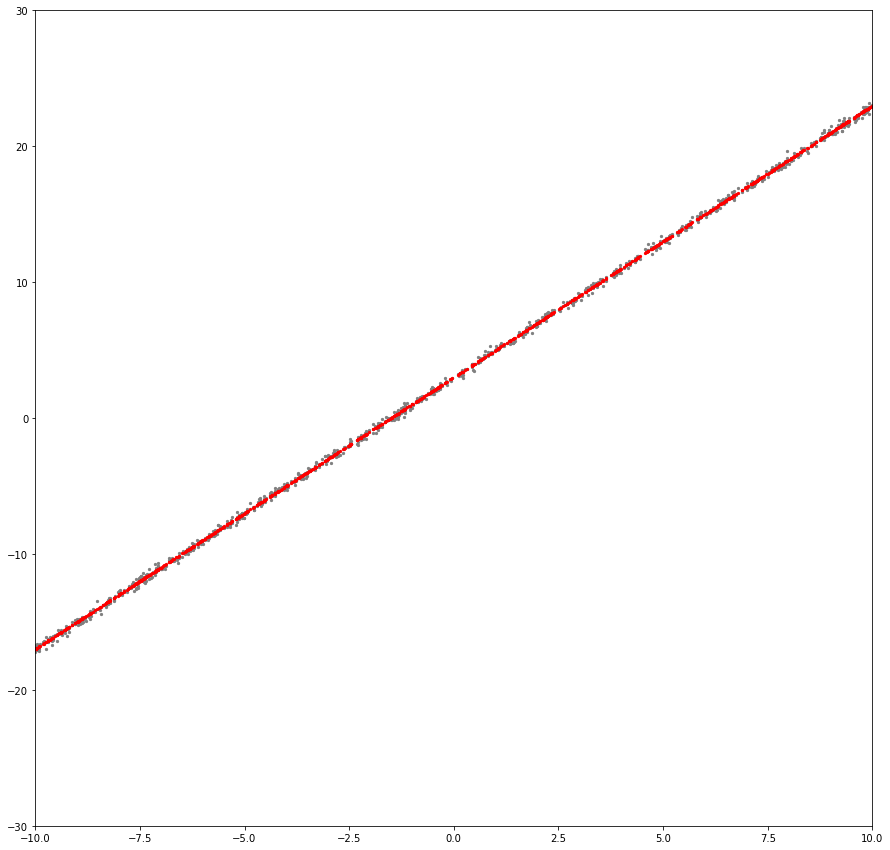

In [6]:
plt.figure(figsize=(15,15))
plt.scatter(x.numpy(),y_noise.numpy(),s=5,c="gray")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red")
plt.axis([-10, 10, -30, 30])
plt.show()

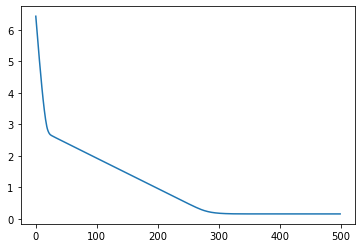

In [7]:
# matplotlib의 plot 함수를 이용해 손실이 어떻게 줄어가는지 확인합니다. 
plt.plot(loss_arr)
plt.show()

In [8]:
# 현재 모델은 weight와 bias을 변수로 가지고 있는데 그 값들이 학습 후 실제 몇인지 수치적으로 확인해봅니다.
param_list = list(model.parameters())
print("Weight:",param_list[0].item(),"\nBias:  ",param_list[1].item())

Weight: 1.999326229095459 
Bias:   3.004322052001953
